# cTRF_toolbox example

Mikolaj Kegler

Imperial College London, 03.05.2018

Contact: mikolaj.kegler16@imperial.ac.uk

This is an attachment to the paper:

'Real-time decoding of selective attention from the human auditory brainstem response to continuous speech' by Octave Etard, Mikolaj Kegler, Chananel Braiman, Antonio Elia Forte and Tobias Reichenbach

Example usage of cTRF toolbox for complex modelling described in the paper. To download the sample data please use the following link: https://imperiallondon-my.sharepoint.com/:f:/g/personal/mak616_ic_ac_uk/En-V7CKltGdPqYKzd5xJ6a0BljqepRaHF-m9ta__LdtYhA?e=NgMXUv. The sample EEG and fundamental waveform data are the same as used in the paper and were obtained as described in the methods section.

NOTE: The sample data are high-samled and therefore fitting the complex backward models might require extensive amounts of RAM and might take a long time to computer. It is highly recommended to run this code on a computing cluster cluster or a specialized machine. On a personal PC with a typical hardware specification (8 gb RAM) we recommend running the complex forward models that are siginficantly 'lighter' in terms of number of parameters and required computational power.

Required packages to run this demo:

MNE https://martinos.org/mne/dev/index.html

NumPy http://www.numpy.org/

SciPy https://www.scipy.org/

Matplotlib https://matplotlib.org/

cTRF custom package (cTRF.py attached)

In [1]:
import numpy as np
import mne
import cTRF
import matplotlib.pyplot as plt

In [2]:
# Load eeg data
eeg = mne.io.read_raw_fif('./eeg_raw.fif', preload=True)
eeg_data = eeg.get_data().T

# Load envelope data
FW = np.load('./FW.npy').T

# Choose range of regularization parameters
# NOTE: Most forward models typically required little to none regularization.
lambdas = [0]

# Choose range of time-lags considered in the model (in samples).
# NOTE: Here, the EEG is sampled at 1kHz, so choosing range from -5 to 20, mean latencies from -5 to 20 ms with 1 ms increment.
tlag = [-5, 20]

Opening raw data file /home/mak616/Desktop/cTRF_toolbox/TRF_code_simple/eeg_raw.fif...
    Range : 0 ... 665569 =      0.000 ...   665.569 secs
Ready.
Reading 0 ... 665569  =      0.000 ...   665.569 secs...


In [3]:
# Example use of train function from cTRF package to build a complex forward model
forward = cTRF.train(eeg_data, FW, tlag, forward=True, complex=True, lambdas=lambdas)

# Output of the forward model should be interpreted as [regularization_parameter, timelags*2 (real and imaginary parts), EEG_channels]
# Ouput of the complex backward model should be intepreted as [regularization_parameter, timelags*EEG_channels*2 (real and imaginary parts)]

In [4]:
# Here real and imaginary parts of the forward model are extracted as Br and Bi, respectively (for all used regularization parameters - first dimension). 
Br = forward[:,:25,:]
Bi = forward[:,25:,:]

# NOTE: in the complex backward model the complex coefficients are a single vector (for each regularization parameter)
# The following should be used to extrac real and imaginary parts of complex backward model's coefficients
# 
# <To be filled in>

# Next, the amplitde and phase of each complex coefficient is computed as Amp and Phi, respectively
Amp = np.abs(Br + 1j*Bi)
Phi = np.angle(Br + 1j*Bi)

[[[   52.2508187     75.78906999    60.51227186 ...   209.88184039
      70.10807333   122.62021084]
  [  501.97529352   716.16531956   584.51346206 ...  1998.81460201
     663.61424591  1178.10635953]
  [ 2298.4890215   3235.85439589  2705.42426056 ...  9084.72905014
    3006.07196589  5393.7067264 ]
  ...
  [ 3429.95354174  4617.79980113  6489.05403576 ... 16908.73844726
    5065.66119884 10442.79810096]
  [  764.44590305  1022.7720547   1460.75354181 ...  3811.84067176
    1134.52377403  2379.10560823]
  [   82.11119815   109.06072451   158.7198323  ...   415.50984035
     122.61600589   262.54269774]]]


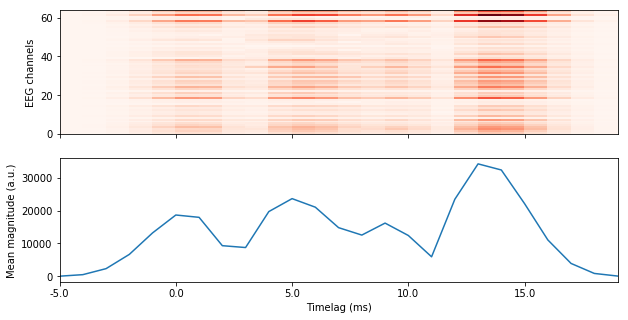

In [5]:
# Matrix representation of complex coefficients

f, (ax1, ax2) = plt.subplots(2,1,sharex=True)

f.set_figwidth(10)
f.set_figheight(5)

lmbd = 0 # Regularization parameter. Here with index 0.

print (Amp)

ax1.pcolor(Amp[lmbd,:,:].T, cmap='Reds')
ax1.set_xlim(0,24)
ax1.set_ylabel('EEG channels')
ax2.plot(np.mean(Amp[lmbd,:,:], axis=1))
ax2.set_xlabel('Timelag (ms)')
ax2.set_xticklabels(ax2.get_xticks()-5)
ax2.set_ylabel('Mean magnitude (a.u.)')

plt.show(f)

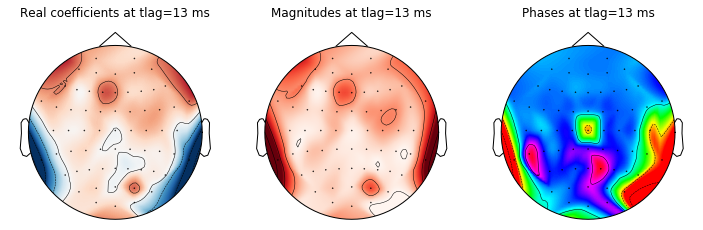

In [6]:
# Complex coefficients topographies

f, (ax1, ax2, ax3) = plt.subplots(1,3)

f.set_figwidth(10)

t = np.argmax(np.mean(Amp[lmbd,:,:], axis=1)) # Show topographies at latency of the peak in mean magnitudes (major contribution)

mne.viz.plot_topomap(Br[0,t,:], eeg.info, axes=ax1, cmap='RdBu_r', show=False)
ax1.set_title('Real coefficients at tlag={} ms'.format(t + tlag[0]))
mne.viz.plot_topomap(Amp[0,t,:], eeg.info, axes=ax2, cmap='Reds', show=False)
ax2.set_title('Magnitudes at tlag={} ms'.format(t + tlag[0]))
mne.viz.plot_topomap(Phi[0,t,:], eeg.info, axes=ax3, cmap='hsv', show=False)
ax3.set_title('Phases at tlag={} ms'.format(t + tlag[0]))

f.tight_layout()

plt.show(f)